In [3]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./EEG_data.csv', encoding='utf-8')
df.head()
df = df.rename(columns={"user-definedlabeln": "userlabel"})

In [5]:
data= df[(df['predefinedlabel']  == 0) & (df['userlabel']  == 0) | (df['predefinedlabel']  == 1) & (df['userlabel']  == 1)]
print("data shape", data.shape)

data shape (6253, 15)


In [6]:
data.drop(columns=["predefinedlabel"], inplace=True)
data = data.rename(columns={"userlabel": "label"})
print("data", data.shape)

data (6253, 14)


In [7]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("label")

dataT  = data[cols2zscore].values
print("dataT ==========>", data.shape)

labels = data['label'].values
labels = labels[:, None]
print("lables =========>", labels.shape)

dataT ==========> (6253, 14)
lables =========> (6253, 1)


<Axes: >

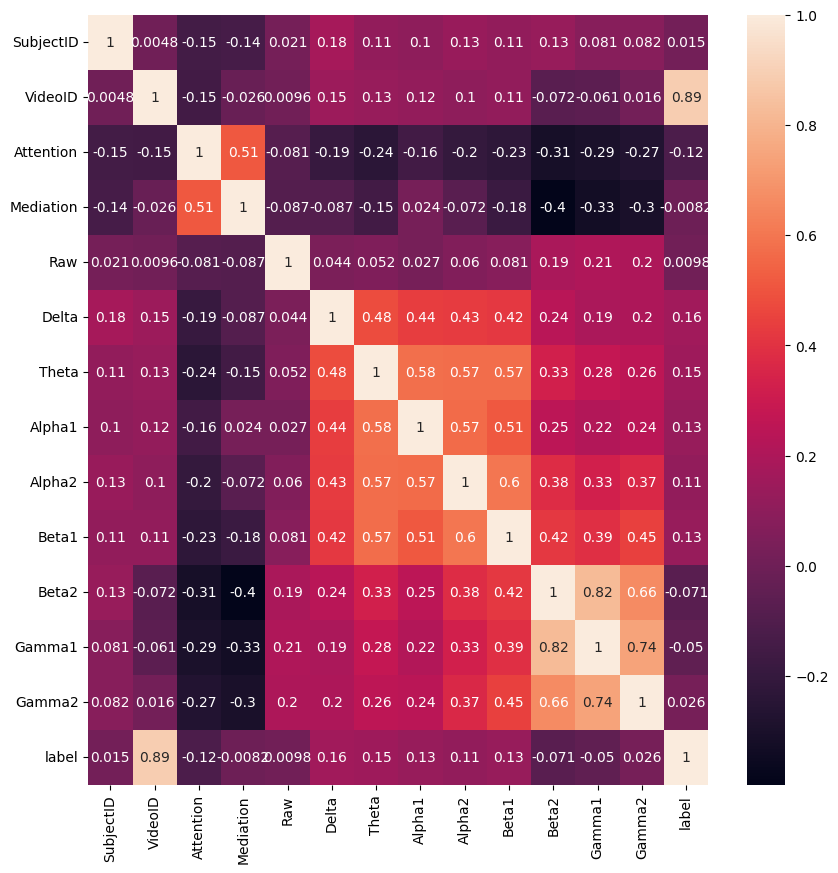

In [8]:
plt.figure(figsize = (10,10))
cor_matrix = data.corr()
sns.heatmap(cor_matrix,annot=True)

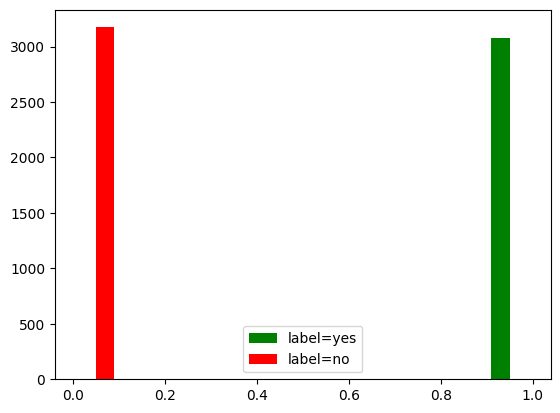

In [9]:
label_yes = data[data.label == 1].label
label_no = data[data.label == 0].label
plt.hist([ label_yes, label_no],color=["green", "red"], label=["label=yes", "label=no"])
plt.legend()

In [10]:
data_mean = dataT.mean(axis=0)
print(dataT.shape)
print("data_mean", data_mean)



(6253, 13)
data_mean [4.48136894e+00 4.17015832e+00 4.28208860e+01 4.67954582e+01
 5.98466336e+01 6.15550413e+05 1.72796432e+05 4.20007542e+04
 3.20879042e+04 2.35596083e+04 3.96223728e+04 3.19219720e+04
 1.36988719e+04]


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataT)

train_data, test_data, train_labels, test_labels = train_test_split(data_scaled, labels, test_size=.3)

In [12]:
# training set result without feature selection
lda = LinearDiscriminantAnalysis()

#training
lda.fit(train_data,train_labels)

#testing
prediction = lda.predict(test_data)
prediction = prediction[:, None]

error = sum(abs(prediction - test_labels))
print("total error with all features = ", error)



total error with all features =  [11.]


In [13]:
bestFeature = 100*numpy.ones(3)
print("bestFeature", bestFeature)

bestFeature [100. 100. 100.]


### Forword search and Linear Discriminant analysis 

Number of Features : 1
--------------------
Selected Features : [1]


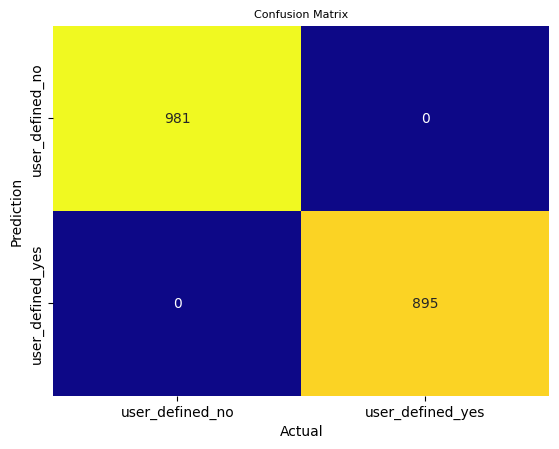

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0000 seconds

Number of Features : 2
--------------------
Selected Features : [1, 0]


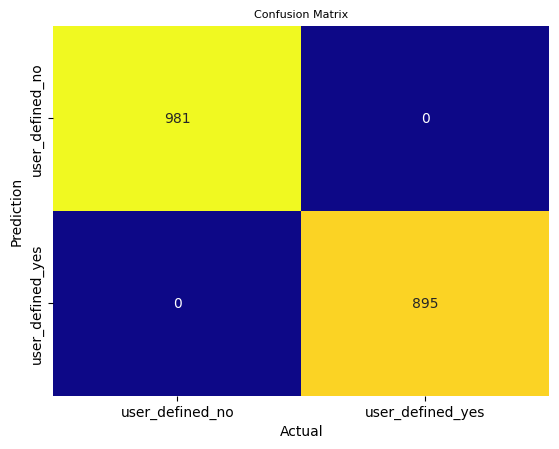

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0010 seconds

Testing Computation Time 0.0000 seconds

Number of Features : 3
--------------------
Selected Features : [1, 0, 2]


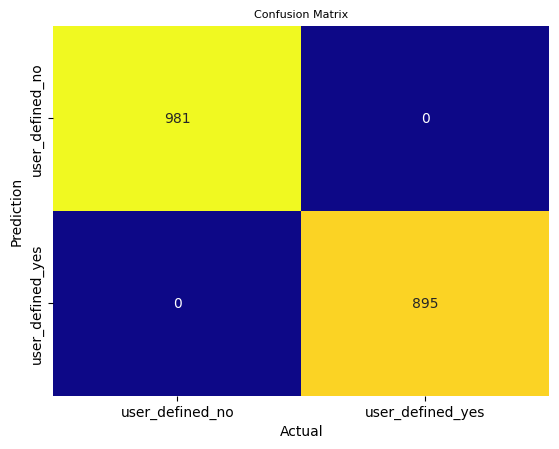

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0010 seconds

Testing Computation Time 0.0010 seconds

Number of Features : 4
--------------------
Selected Features : [1, 0, 2, 3]


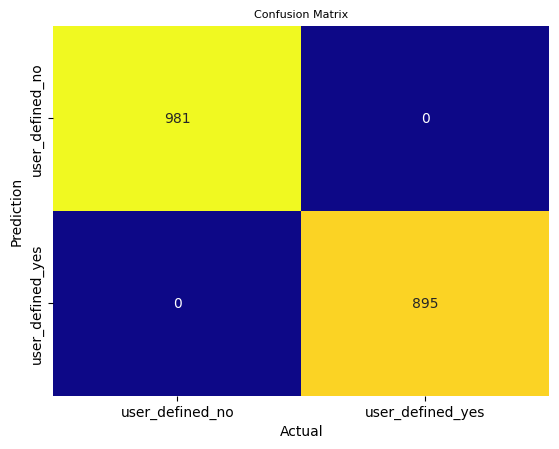

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0000 seconds

Number of Features : 5
--------------------
Selected Features : [1, 0, 2, 3, 4]


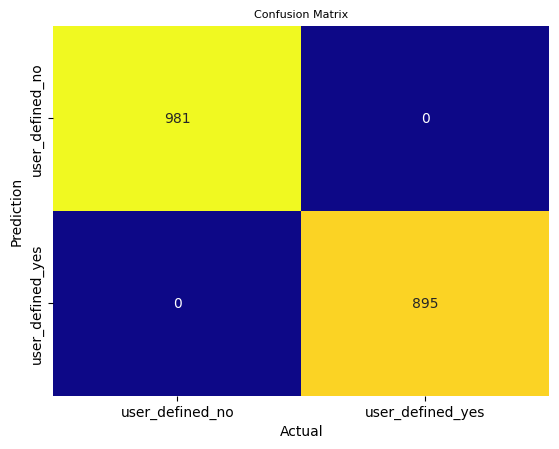

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0000 seconds

Number of Features : 6
--------------------
Selected Features : [1, 0, 2, 3, 4, 10]


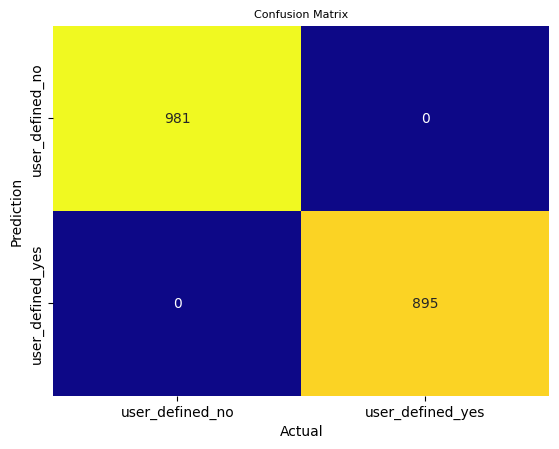

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0009 seconds

Number of Features : 7
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11]


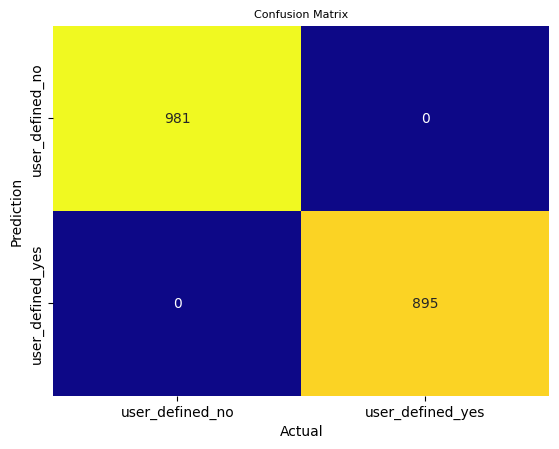

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0037 seconds

Testing Computation Time 0.0009 seconds

Number of Features : 8
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12]


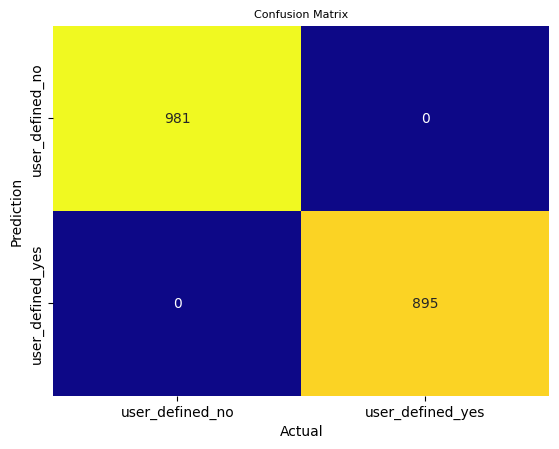

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000

Traininig Computation Time 0.0029 seconds

Testing Computation Time 0.0010 seconds

Number of Features : 9
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12, 8]


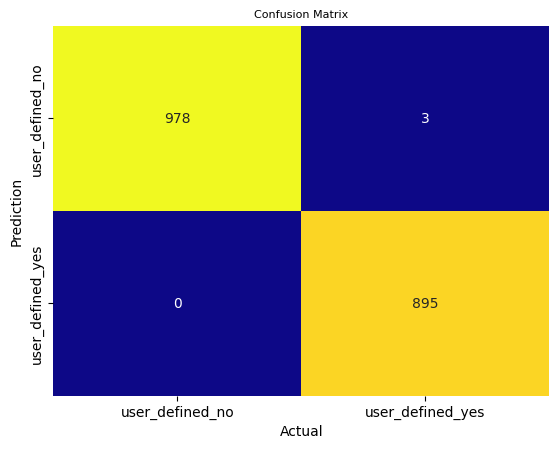

Accuracy==: 0.9984
Precision=: 0.9967
Recall====: 1.0000
F1-score==: 0.9983

Traininig Computation Time 0.0034 seconds

Testing Computation Time 0.0000 seconds

Number of Features : 10
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12, 8, 7]


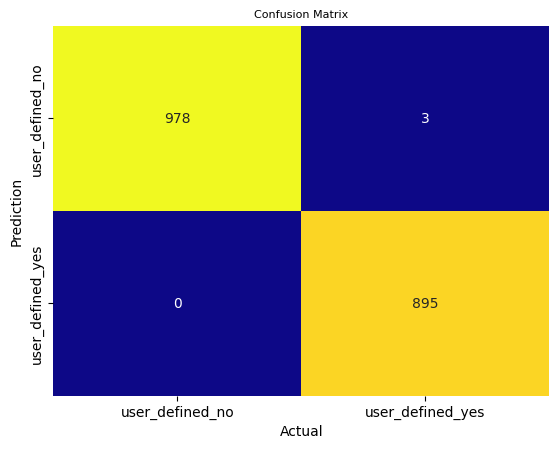

Accuracy==: 0.9984
Precision=: 0.9967
Recall====: 1.0000
F1-score==: 0.9983

Traininig Computation Time 0.0057 seconds

Testing Computation Time 0.0010 seconds

Number of Features : 11
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12, 8, 7, 9]


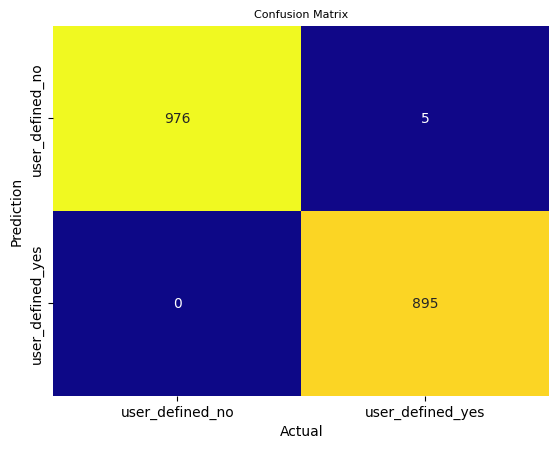

Accuracy==: 0.9973
Precision=: 0.9944
Recall====: 1.0000
F1-score==: 0.9972

Traininig Computation Time 0.0070 seconds

Testing Computation Time 0.0007 seconds

Number of Features : 12
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12, 8, 7, 9, 6]


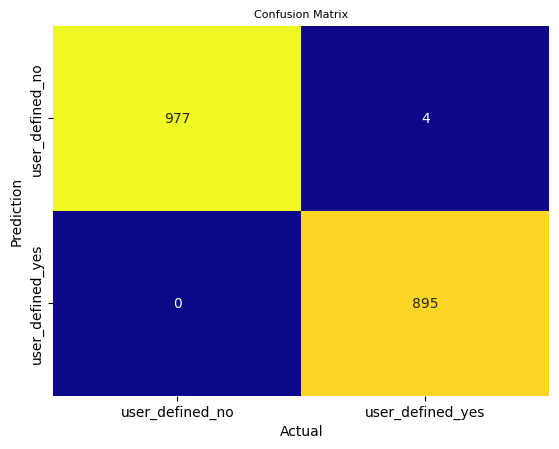

Accuracy==: 0.9979
Precision=: 0.9956
Recall====: 1.0000
F1-score==: 0.9978

Traininig Computation Time 0.0065 seconds

Testing Computation Time 0.0010 seconds

Number of Features : 13
--------------------
Selected Features : [1, 0, 2, 3, 4, 10, 11, 12, 8, 7, 9, 6, 5]


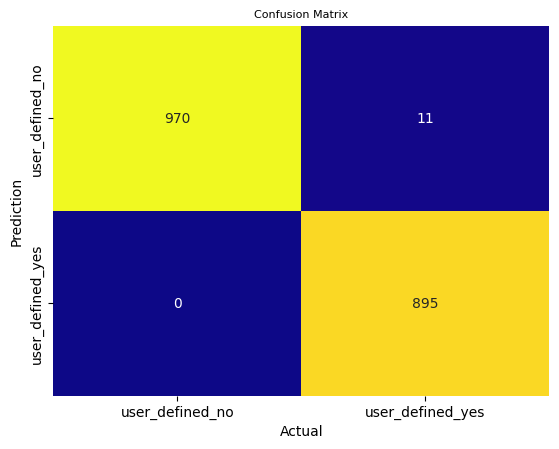

Accuracy==: 0.9941
Precision=: 0.9879
Recall====: 1.0000
F1-score==: 0.9939

Traininig Computation Time 0.0061 seconds

Testing Computation Time 0.0000 seconds



In [14]:
forword_search_dimension_output_lda = []

for features in range(1,14):
    
    #list of features selected and remaining by index
    selected = []
    remaining = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    
    #currently selected features from dataset
    Xselection = np.empty((train_data.shape[0],0))
    
    #iterate over all selected features
    for iteration in range(features):

        error = 10000 * np.ones(13)

        #iterate over remaining features
        for i in remaining:
            
            #now, add this to the previously selected features
            Xtrain = Xselection
            Xtrain = np.append(Xtrain, train_data[:,i].reshape(train_data.shape[0],1), axis=1 )

            #classify the training data using currently selected features
            lda = LinearDiscriminantAnalysis()
            lda.fit(Xtrain,train_labels)
            prediction = lda.predict(Xtrain)
            prediction = prediction[:, None]
            error[i] = sum(prediction != train_labels)

        #get the index of the best feature
        best = np.argmin(error)

        #update the selected feature list
        selected.append(best)
        
        #update the remaining feature list
        remaining.remove(best)
        
        #update the currently selected features from the database
        Xselection = np.append(Xselection, train_data[:,best].reshape(train_data.shape[0],1), axis=1)


    #training set result with feature selection...
    trainig_start_time = time.time()
    lda = LinearDiscriminantAnalysis()
    lda.fit(Xselection,train_labels)
    training_end_time = time.time()
    training_computation_time = training_end_time - trainig_start_time

    testing_start_time = time.time()
    prediction = lda.predict(test_data[:,selected])
    testing_end_time = time.time()
    error = sum(prediction != test_labels)
    testing_computation_time = testing_end_time - testing_start_time
    
    l=[error , selected , testing_computation_time, training_computation_time]
    forword_search_dimension_output_lda.append(l)
    
    confusion_matrix = metrics.confusion_matrix(test_labels, prediction)
    
    sns.heatmap(confusion_matrix,  annot=True,  fmt='d', cmap='plasma', cbar=False, xticklabels=['user_defined_no','user_defined_yes'], yticklabels=['user_defined_no','user_defined_yes'])
    
    print(f"Number of Features : {features}")
    print("-"*20)

    print(f"Selected Features : {selected}")

    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=8)
    plt.show()
    accuracy = metrics.accuracy_score(test_labels,prediction)
    
    print(f"Accuracy==: {accuracy:.4f}")
    
    precision = metrics.precision_score(test_labels,prediction)
    print(f"Precision=: {precision:.4f}")
    
    recall = metrics.recall_score(test_labels,prediction)
    print(f"Recall====: {recall:.4f}")
    
    F1_score = metrics.f1_score(test_labels,prediction)
    print(f"F1-score==: {F1_score:.4f}\n")
    
    print(f"Traininig Computation Time {training_computation_time:.4f} seconds\n")
    print(f"Testing Computation Time {testing_computation_time:.4f} seconds\n")

In [25]:
train_samples = []
test_samples = []
for error,selected, testing_computation_time, training_computation_time in forword_search_dimension_output_lda:
    train_samples.append(training_computation_time)
    test_samples.append(testing_computation_time)    

train_samples =  np.array(train_samples).mean()
test_sample = np.array(test_samples).mean()
print("train_samples mean", train_samples, "test_sample mean", test_sample )

train_samples mean 0.0034778668330265926 test_sample mean 0.0004960023439847506


### K nearest neighbour 

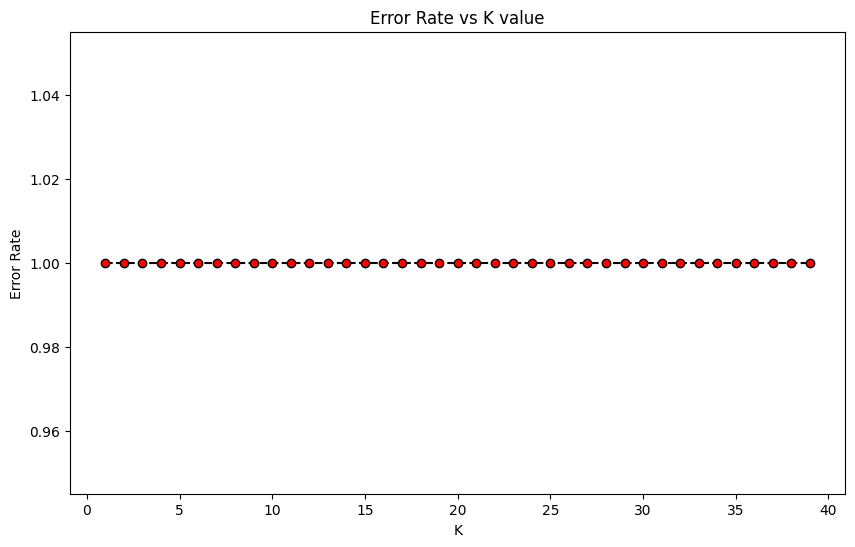

In [26]:
# Function to check the value of k for K-Nearest Neighbour Classifier
def check_for_k(xTrain,yTrain,xTest,yTest):
    error_rate = []

    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xTrain,yTrain)
        pred_i=knn.predict(xTest)
        pred_i = pred_i[:, None]
        error_rate.append(np.mean(pred_i!=yTest))
            
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='black',ls='dashed',marker='o',markerfacecolor = 'red')
    plt.title('Error Rate vs K value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    
check_for_k(train_data,train_labels,test_data,test_data)

### Forword search and K nearest neighbour(KNN)

Number of features : 1
--------------------
Selected features : [1]


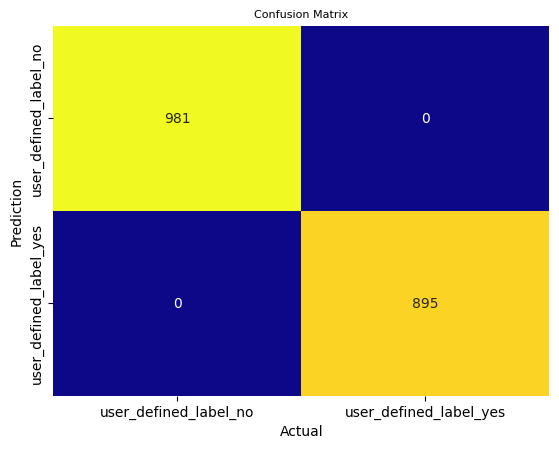

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0892 seconds

Number of features : 2
--------------------
Selected features : [1, 0]


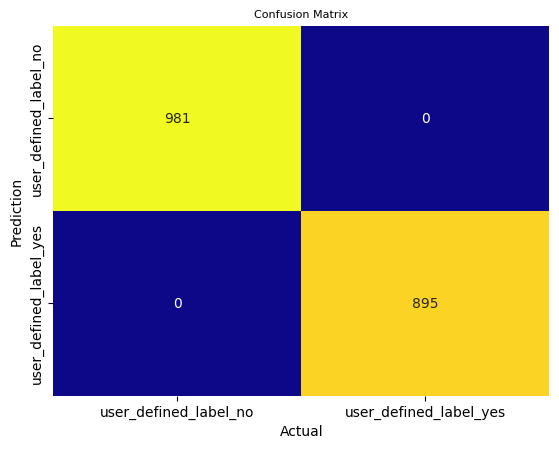

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0913 seconds

Number of features : 3
--------------------
Selected features : [1, 0, 2]


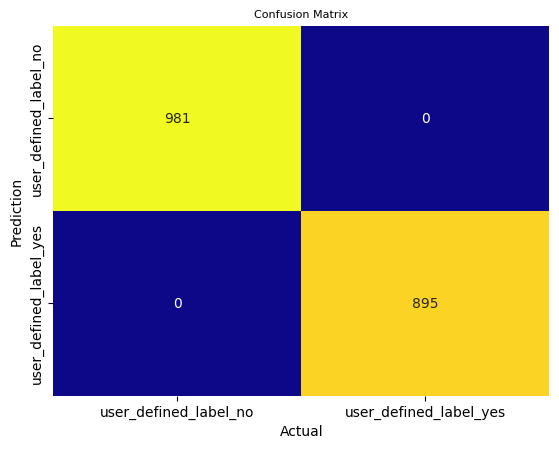

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0823 seconds

Number of features : 4
--------------------
Selected features : [1, 0, 2, 4]


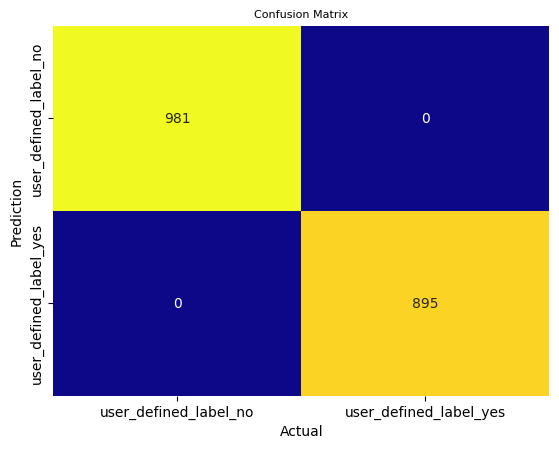

Accuracy==: 1.0000
Precision=: 1.0000
Recall====: 1.0000
F1-score==: 1.0000
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.0983 seconds

Number of features : 5
--------------------
Selected features : [1, 0, 2, 4, 12]


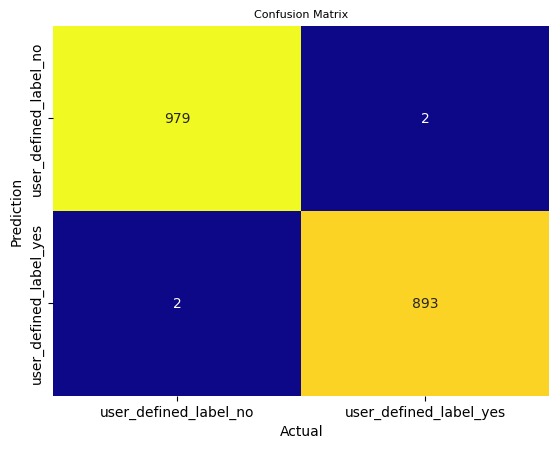

Accuracy==: 0.9979
Precision=: 0.9978
Recall====: 0.9978
F1-score==: 0.9978
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.0992 seconds

Number of features : 6
--------------------
Selected features : [1, 0, 2, 4, 12, 10]


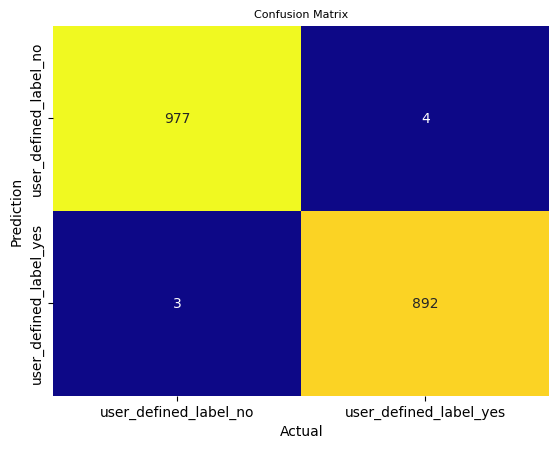

Accuracy==: 0.9963
Precision=: 0.9955
Recall====: 0.9966
F1-score==: 0.9961
Traininig Computation Time 0.0070 seconds

Testing Computation Time 0.1601 seconds

Number of features : 7
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11]


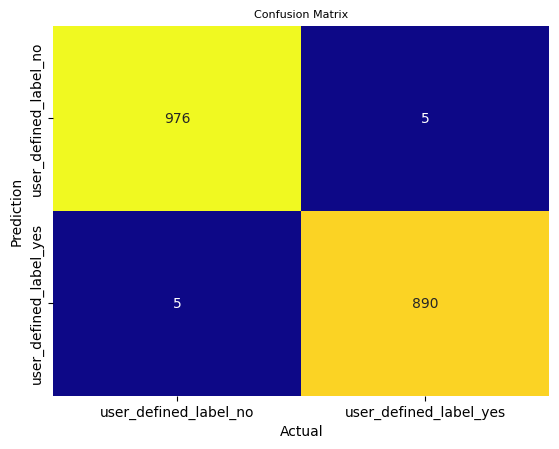

Accuracy==: 0.9947
Precision=: 0.9944
Recall====: 0.9944
F1-score==: 0.9944
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1238 seconds

Number of features : 8
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8]


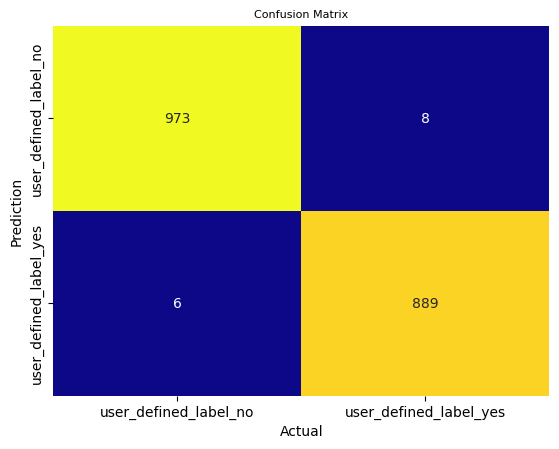

Accuracy==: 0.9925
Precision=: 0.9911
Recall====: 0.9933
F1-score==: 0.9922
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.1283 seconds

Number of features : 9
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8, 7]


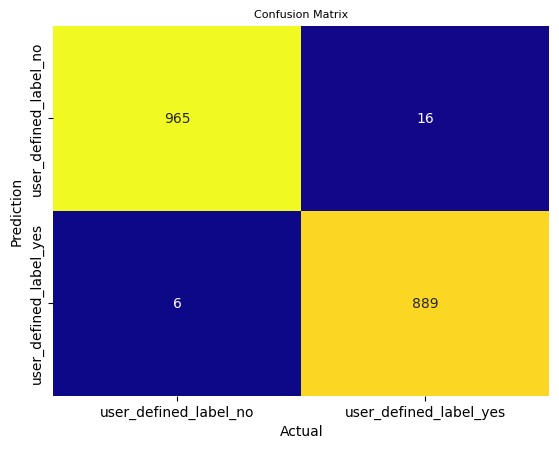

Accuracy==: 0.9883
Precision=: 0.9823
Recall====: 0.9933
F1-score==: 0.9878
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1578 seconds

Number of features : 10
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8, 7, 3]


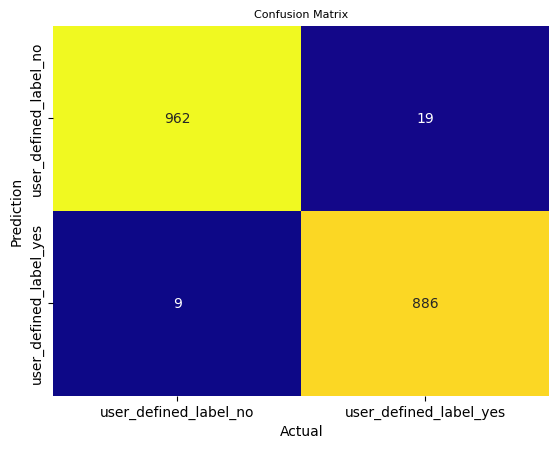

Accuracy==: 0.9851
Precision=: 0.9790
Recall====: 0.9899
F1-score==: 0.9844
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1696 seconds

Number of features : 11
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8, 7, 3, 9]


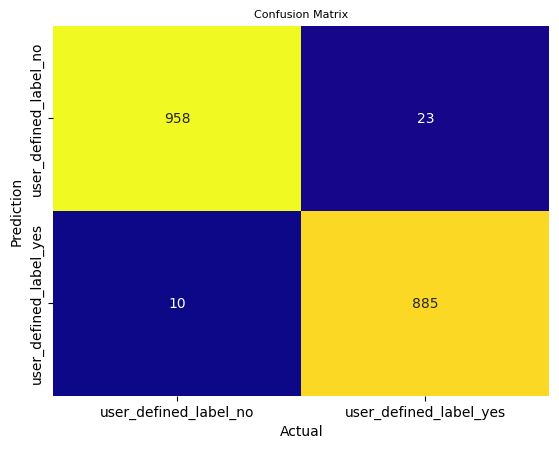

Accuracy==: 0.9824
Precision=: 0.9747
Recall====: 0.9888
F1-score==: 0.9817
Traininig Computation Time 0.0060 seconds

Testing Computation Time 0.1897 seconds

Number of features : 12
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8, 7, 3, 9, 5]


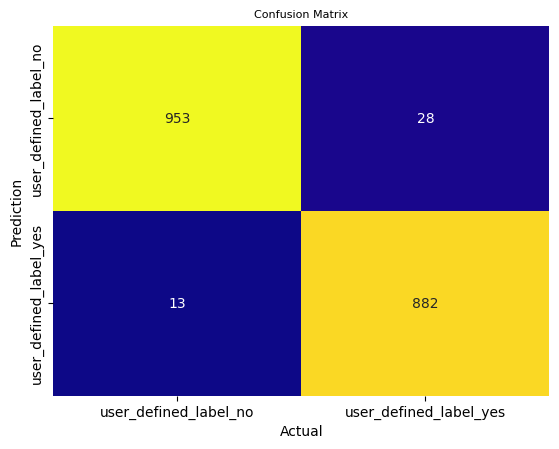

Accuracy==: 0.9781
Precision=: 0.9692
Recall====: 0.9855
F1-score==: 0.9773
Traininig Computation Time 0.0099 seconds

Testing Computation Time 0.2135 seconds

Number of features : 13
--------------------
Selected features : [1, 0, 2, 4, 12, 10, 11, 8, 7, 3, 9, 5, 6]


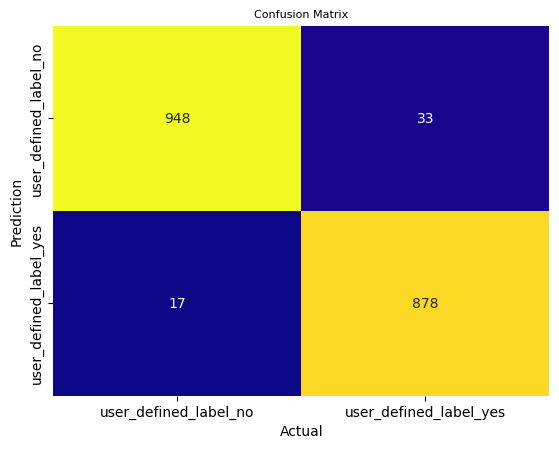

Accuracy==: 0.9733
Precision=: 0.9638
Recall====: 0.9810
F1-score==: 0.9723
Traininig Computation Time 0.0060 seconds

Testing Computation Time 0.2235 seconds



In [27]:
K_neighbour_dimension_output = []

for features in range(1,14):
    
    #list of features selected by index
    selected = []
    
    #list of features remaining by index
    remaining = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    
    #currently selected features from dataset
    Xselection = np.empty((train_data.shape[0],0))
    
    #iterate over all selected features
    for iteration in range(features):

        error = 10000 * np.ones(13)

        #iterate over remaining features
        for i in remaining:
            
            #now, add this to the previously selected features
            Xtrain = Xselection
            Xtrain = np.append(Xtrain, train_data[:,i].reshape(train_data.shape[0],1), axis=1)

            #classify the training data using currently selected features
            knn = KNeighborsClassifier(n_neighbors=5)
            knn.fit(Xtrain,train_labels)
            
            pred_i=knn.predict(Xtrain)
            prediction = pred_i[:, None]
            error[i] = sum(prediction != train_labels)

        #get the index of the best feature
        best = np.argmin(error)
        
        #update the selected feature list
        selected.append(best)
        
        #update the remaining feature list
        remaining.remove(best)
        
        #update the currently selected features from the database
        Xselection = np.append(Xselection, train_data[:,best].reshape(train_data.shape[0],1), axis=1)


    #training set result with feature selection...
    knn = KNeighborsClassifier(n_neighbors=5)
    trainig_start_time = time.time()
    knn.fit(Xselection,train_labels)
    training_end_time = time.time()
    training_computation_time = training_end_time - trainig_start_time
    
    
    testing_start_time = time.time()
    prediction = knn.predict(test_data[:,selected])
    testing_end_time = time.time()
    testing_computation_time = testing_end_time - testing_start_time
    prediction = prediction[:, None]
    
    error = sum(prediction != test_labels)
    
    l=[error,selected,testing_computation_time, training_computation_time]
    K_neighbour_dimension_output.append(l)
    
    confusion_matrix = metrics.confusion_matrix(test_labels, prediction)
    
    sns.heatmap(confusion_matrix,  annot=True,  fmt='d', cmap='plasma', cbar=False, xticklabels=['user_defined_label_no','user_defined_label_yes'], yticklabels=['user_defined_label_no','user_defined_label_yes'])
    
    print(f"Number of features : {features}")
    print("-"*20)

    print(f"Selected features : {selected}")

    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=8)
    plt.show()
    accuracy = metrics.accuracy_score(test_labels,prediction)
    print(f"Accuracy==: {accuracy:.4f}")
    
    precision = metrics.precision_score(test_labels,prediction)
    print(f"Precision=: {precision:.4f}")
    
    recall = metrics.recall_score(test_labels,prediction)
    print(f"Recall====: {recall:.4f}")
    
    F1_score = metrics.f1_score(test_labels,prediction)
    print(f"F1-score==: {F1_score:.4f}")
    
    print(f"Traininig Computation Time {training_computation_time:.4f} seconds\n")
    print(f"Testing Computation Time {testing_computation_time:.4f} seconds\n")

In [28]:
train_samples = []
test_samples = []
for error,selected, testing_computation_time, training_computation_time in K_neighbour_dimension_output:
    train_samples.append(training_computation_time)
    test_samples.append(testing_computation_time)    

train_samples =  np.array(train_samples).mean()
test_sample = np.array(test_samples).mean()
print("train_samples mean", train_samples, "test_sample mean", test_sample )

train_samples mean 0.004984287115243765 test_sample mean 0.14051037568312424


### PCA with Linear Discriminant analysis(LDA)

dimension 1
Number of dimension : 1
--------------------
No Of Components : 1


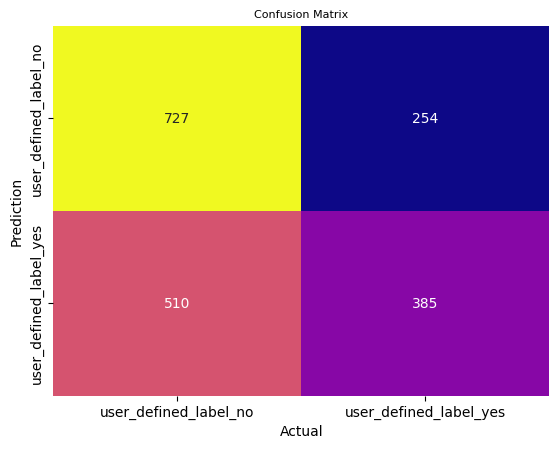

Accuracy==: 0.5928
Precision=: 0.6025
Recall====: 0.4302
F1-score==: 0.5020
Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0000 seconds

dimension 2
Number of dimension : 2
--------------------
No Of Components : 2


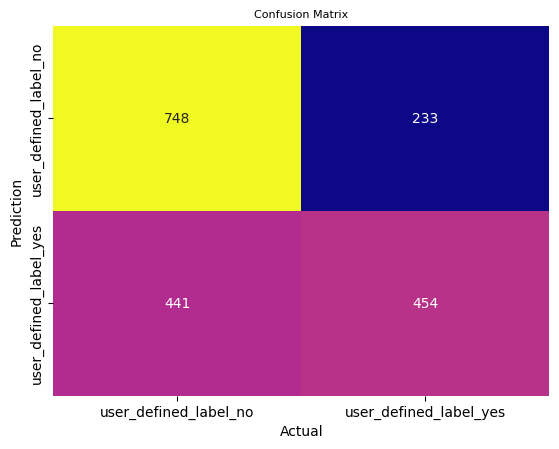

Accuracy==: 0.6407
Precision=: 0.6608
Recall====: 0.5073
F1-score==: 0.5740
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0000 seconds

dimension 3
Number of dimension : 3
--------------------
No Of Components : 3


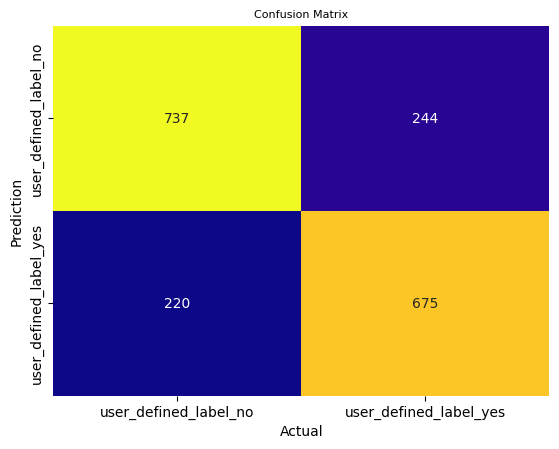

Accuracy==: 0.7527
Precision=: 0.7345
Recall====: 0.7542
F1-score==: 0.7442
Traininig Computation Time 0.0010 seconds

Testing Computation Time 0.0010 seconds

dimension 4
Number of dimension : 4
--------------------
No Of Components : 4


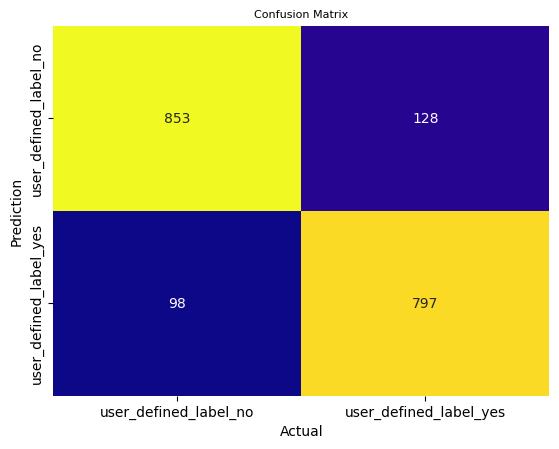

Accuracy==: 0.8795
Precision=: 0.8616
Recall====: 0.8905
F1-score==: 0.8758
Traininig Computation Time 0.0010 seconds

Testing Computation Time 0.0000 seconds

dimension 5
Number of dimension : 5
--------------------
No Of Components : 5


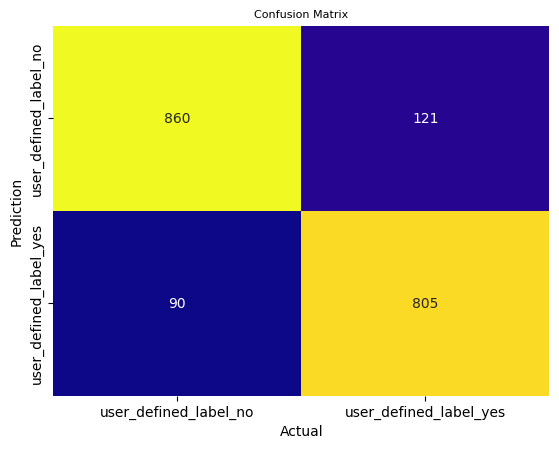

Accuracy==: 0.8875
Precision=: 0.8693
Recall====: 0.8994
F1-score==: 0.8841
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.0000 seconds

dimension 6
Number of dimension : 6
--------------------
No Of Components : 6


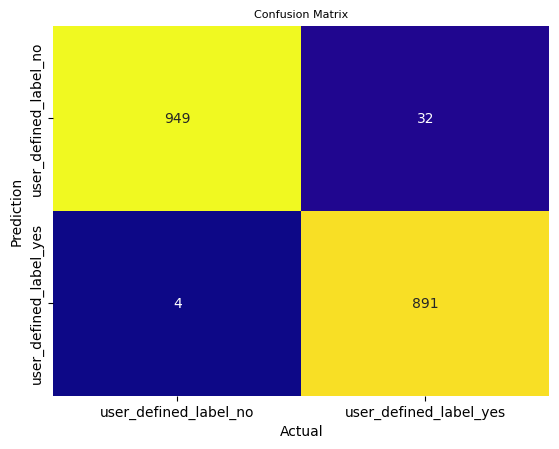

Accuracy==: 0.9808
Precision=: 0.9653
Recall====: 0.9955
F1-score==: 0.9802
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0000 seconds

dimension 7
Number of dimension : 7
--------------------
No Of Components : 7


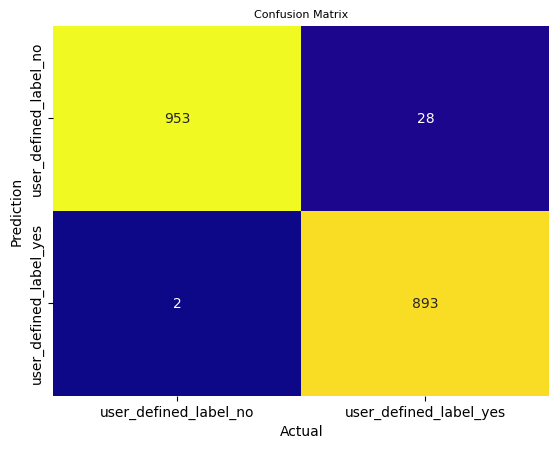

Accuracy==: 0.9840
Precision=: 0.9696
Recall====: 0.9978
F1-score==: 0.9835
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.0010 seconds

dimension 8
Number of dimension : 8
--------------------
No Of Components : 8


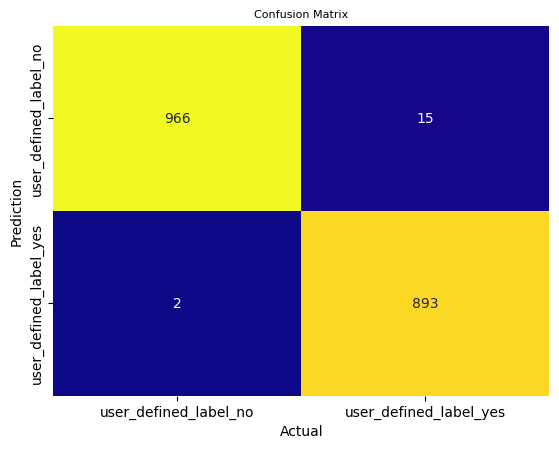

Accuracy==: 0.9909
Precision=: 0.9835
Recall====: 0.9978
F1-score==: 0.9906
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.0010 seconds

dimension 9
Number of dimension : 9
--------------------
No Of Components : 9


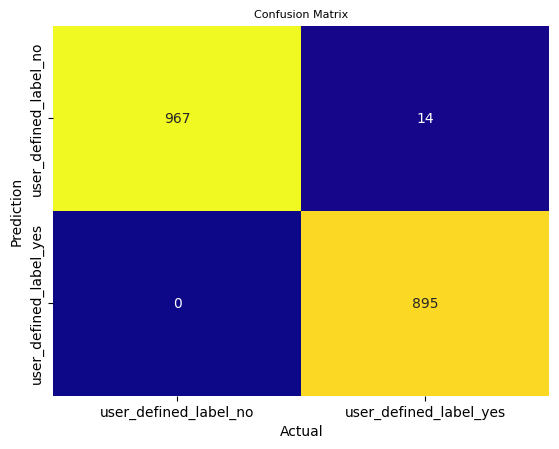

Accuracy==: 0.9925
Precision=: 0.9846
Recall====: 1.0000
F1-score==: 0.9922
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.0000 seconds

dimension 10
Number of dimension : 10
--------------------
No Of Components : 10


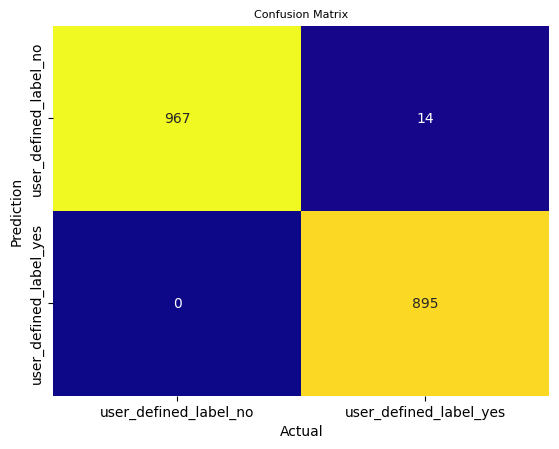

Accuracy==: 0.9925
Precision=: 0.9846
Recall====: 1.0000
F1-score==: 0.9922
Traininig Computation Time 0.0060 seconds

Testing Computation Time 0.0010 seconds

dimension 11
Number of dimension : 11
--------------------
No Of Components : 11


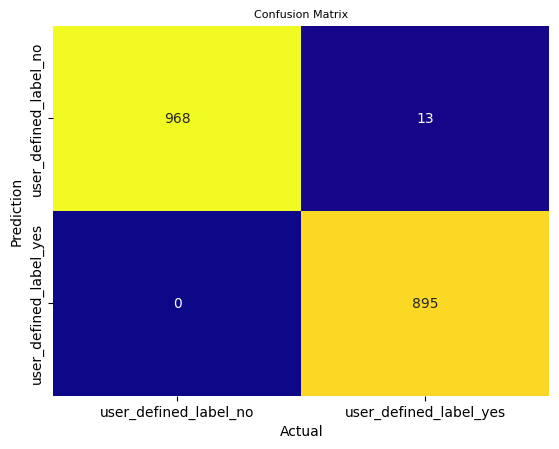

Accuracy==: 0.9931
Precision=: 0.9857
Recall====: 1.0000
F1-score==: 0.9928
Traininig Computation Time 0.0070 seconds

Testing Computation Time 0.0000 seconds

dimension 12
Number of dimension : 12
--------------------
No Of Components : 12


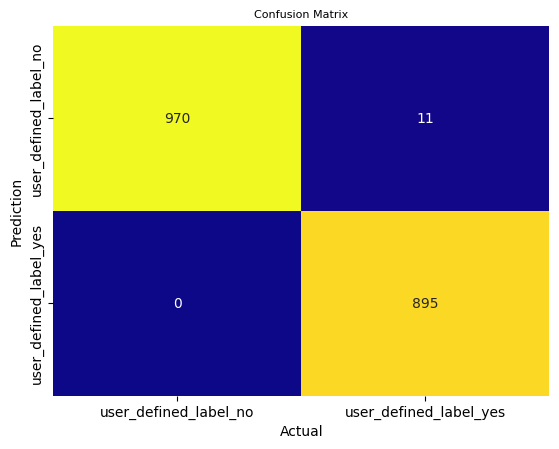

Accuracy==: 0.9941
Precision=: 0.9879
Recall====: 1.0000
F1-score==: 0.9939
Traininig Computation Time 0.0052 seconds

Testing Computation Time 0.0000 seconds

dimension 13
Number of dimension : 13
--------------------
No Of Components : 13


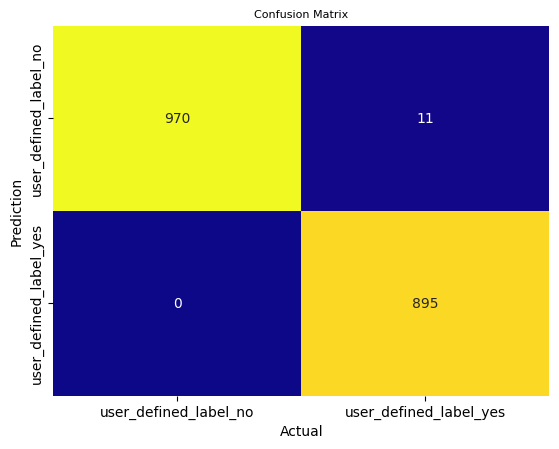

Accuracy==: 0.9941
Precision=: 0.9879
Recall====: 1.0000
F1-score==: 0.9939
Traininig Computation Time 0.0064 seconds

Testing Computation Time 0.0000 seconds



In [30]:
pca_dimension_output_lda = []

for dimension_feature in range(1, 14):
    print("dimension",dimension_feature)
    pca = PCA(n_components = dimension_feature)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)
    
    #training set result with feature selection...
    lda = LinearDiscriminantAnalysis()
    trainig_start_time = time.time()
    lda.fit(train_data_pca,train_labels)
    training_end_time = time.time()
    training_computation_time = training_end_time - trainig_start_time
    
    testing_start_time = time.time()
    prediction = lda.predict(test_data_pca)
    testing_end_time = time.time()
    testing_computation_time = testing_end_time - testing_start_time
    
    error = sum(prediction != test_labels)
    
    l=[error, selected, training_computation_time, testing_computation_time]
    pca_dimension_output_lda.append(l)
    
    confusion_matrix = metrics.confusion_matrix(test_labels, prediction)
    
    sns.heatmap(confusion_matrix,  annot=True,  fmt='d', cmap='plasma', cbar=False, xticklabels=['user_defined_label_no','user_defined_label_yes'], yticklabels=['user_defined_label_no','user_defined_label_yes'])
    
    print(f"Number of dimension : {dimension_feature}")
    print("-"*20)

    print(f"No Of Components : {dimension_feature}")

    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=8)
    plt.show()
    accuracy = metrics.accuracy_score(test_labels,prediction)
    print(f"Accuracy==: {accuracy:.4f}")
    
    precision = metrics.precision_score(test_labels,prediction)
    print(f"Precision=: {precision:.4f}")
    
    recall = metrics.recall_score(test_labels,prediction)
    print(f"Recall====: {recall:.4f}")
    
    F1_score = metrics.f1_score(test_labels,prediction)
    print(f"F1-score==: {F1_score:.4f}")
    
    print(f"Traininig Computation Time {training_computation_time:.4f} seconds\n")
    print(f"Testing Computation Time {testing_computation_time:.4f} seconds\n")

In [31]:
train_samples = []
test_samples = []
for error,selected, testing_computation_time, training_computation_time in pca_dimension_output_lda:
    train_samples.append(training_computation_time)
    test_samples.append(testing_computation_time)    

train_samples =  np.array(train_samples).mean()
test_sample = np.array(test_samples).mean()
print("train_samples mean", train_samples, "test_sample mean", test_sample )

train_samples mean 0.0003058176774245042 test_sample mean 0.004034299116868239


### PCA with (K nearest neighbour )KNN

dimension 1
Number of dimension : 1
--------------------
No Of Components : 1


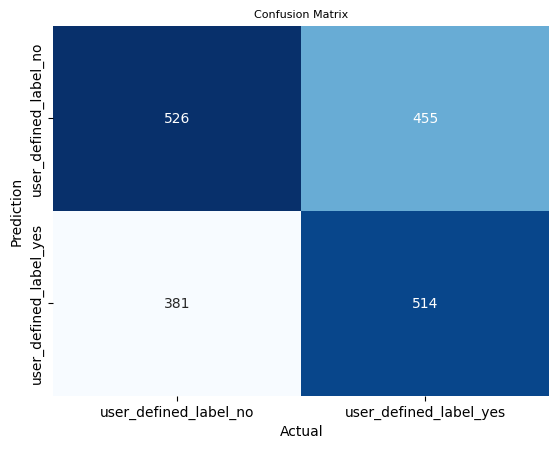

Accuracy  : 0.5544
Precision : 0.5304
Recall    : 0.5743
F1-score  : 0.5515
Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0898 seconds

dimension 2
Number of dimension : 2
--------------------
No Of Components : 2


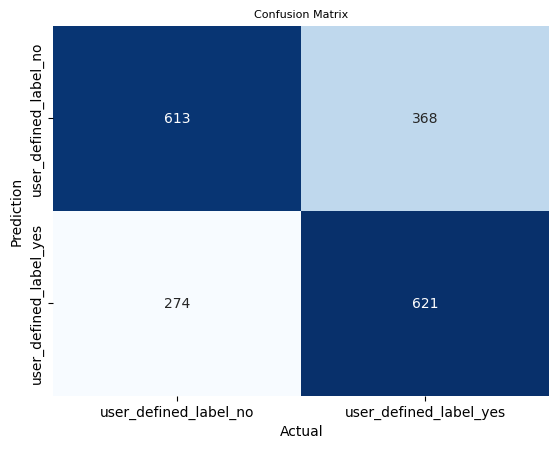

Accuracy  : 0.6578
Precision : 0.6279
Recall    : 0.6939
F1-score  : 0.6592
Traininig Computation Time 0.0020 seconds

Testing Computation Time 0.0936 seconds

dimension 3
Number of dimension : 3
--------------------
No Of Components : 3


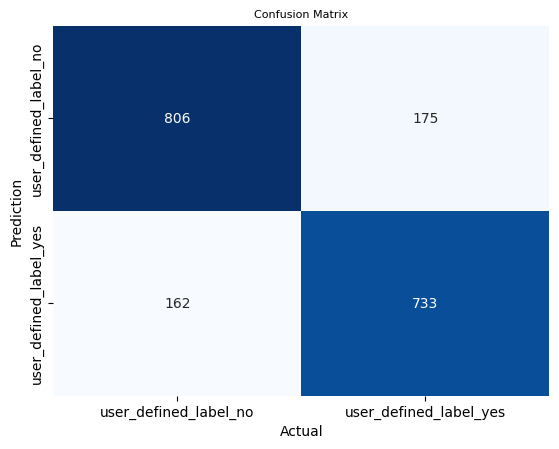

Accuracy  : 0.8204
Precision : 0.8073
Recall    : 0.8190
F1-score  : 0.8131
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0833 seconds

dimension 4
Number of dimension : 4
--------------------
No Of Components : 4


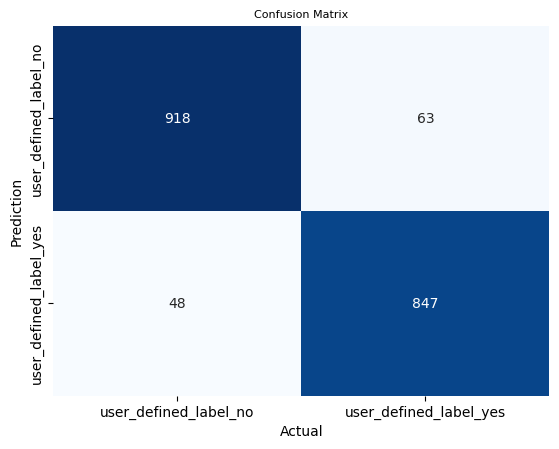

Accuracy  : 0.9408
Precision : 0.9308
Recall    : 0.9464
F1-score  : 0.9385
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0974 seconds

dimension 5
Number of dimension : 5
--------------------
No Of Components : 5


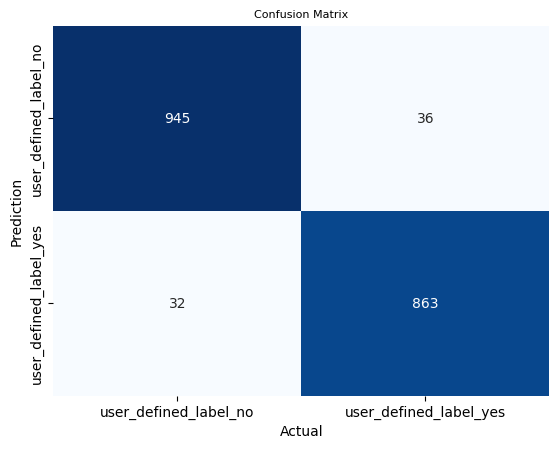

Accuracy  : 0.9638
Precision : 0.9600
Recall    : 0.9642
F1-score  : 0.9621
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.0833 seconds

dimension 6
Number of dimension : 6
--------------------
No Of Components : 6


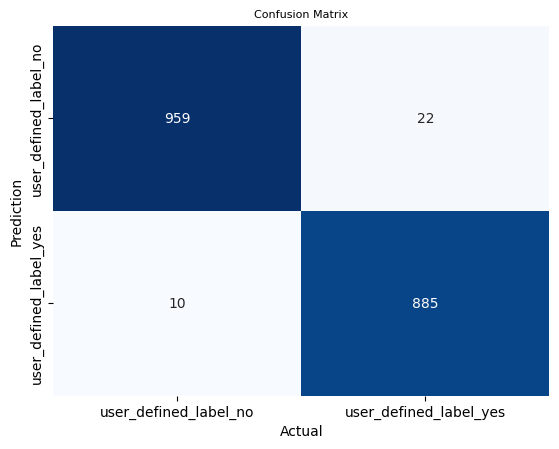

Accuracy  : 0.9829
Precision : 0.9757
Recall    : 0.9888
F1-score  : 0.9822
Traininig Computation Time 0.0030 seconds

Testing Computation Time 0.0887 seconds

dimension 7
Number of dimension : 7
--------------------
No Of Components : 7


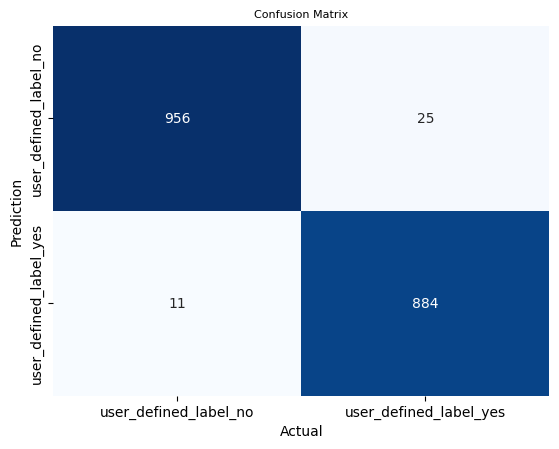

Accuracy  : 0.9808
Precision : 0.9725
Recall    : 0.9877
F1-score  : 0.9800
Traininig Computation Time 0.0040 seconds

Testing Computation Time 0.1008 seconds

dimension 8
Number of dimension : 8
--------------------
No Of Components : 8


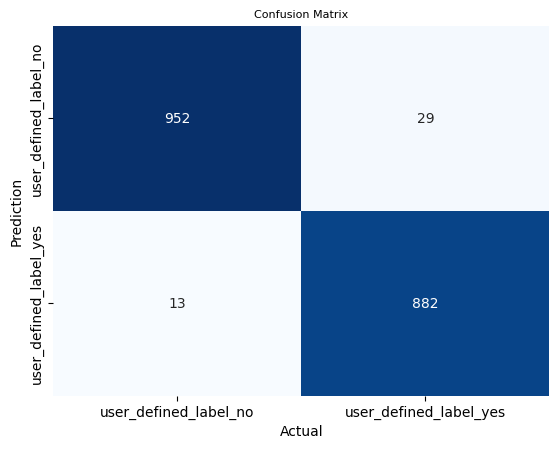

Accuracy  : 0.9776
Precision : 0.9682
Recall    : 0.9855
F1-score  : 0.9767
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1131 seconds

dimension 9
Number of dimension : 9
--------------------
No Of Components : 9


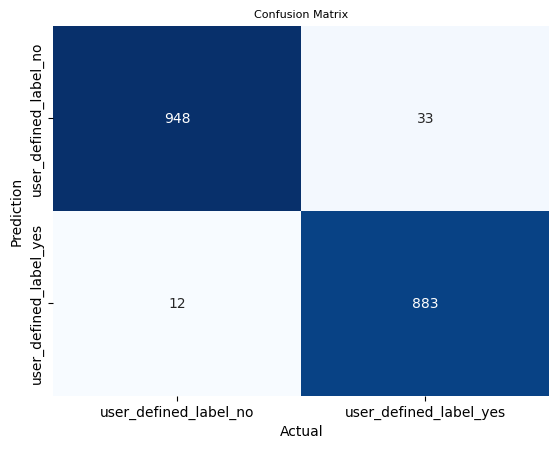

Accuracy  : 0.9760
Precision : 0.9640
Recall    : 0.9866
F1-score  : 0.9752
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1123 seconds

dimension 10
Number of dimension : 10
--------------------
No Of Components : 10


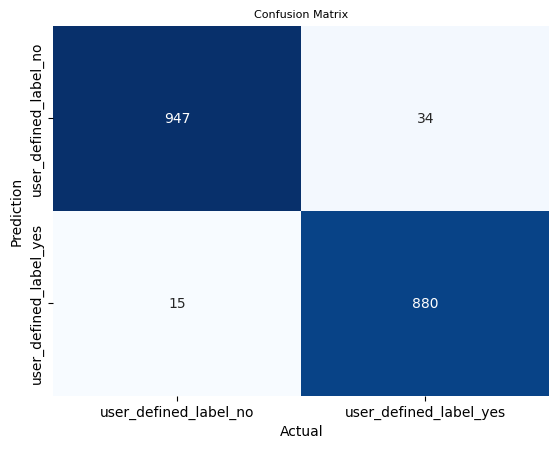

Accuracy  : 0.9739
Precision : 0.9628
Recall    : 0.9832
F1-score  : 0.9729
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1177 seconds

dimension 11
Number of dimension : 11
--------------------
No Of Components : 11


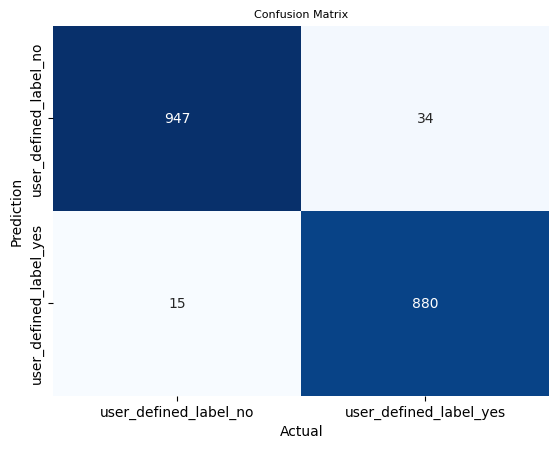

Accuracy  : 0.9739
Precision : 0.9628
Recall    : 0.9832
F1-score  : 0.9729
Traininig Computation Time 0.0055 seconds

Testing Computation Time 0.1561 seconds

dimension 12
Number of dimension : 12
--------------------
No Of Components : 12


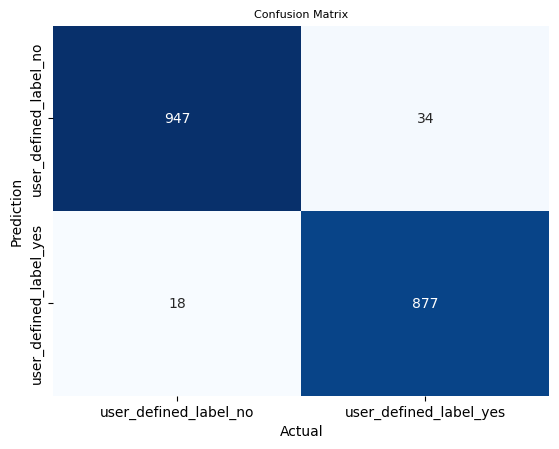

Accuracy  : 0.9723
Precision : 0.9627
Recall    : 0.9799
F1-score  : 0.9712
Traininig Computation Time 0.0050 seconds

Testing Computation Time 0.1318 seconds

dimension 13
Number of dimension : 13
--------------------
No Of Components : 13


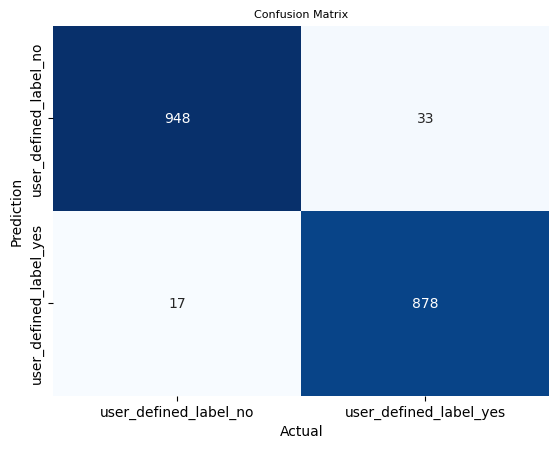

Accuracy  : 0.9733
Precision : 0.9638
Recall    : 0.9810
F1-score  : 0.9723
Traininig Computation Time 0.0055 seconds

Testing Computation Time 0.1401 seconds



In [32]:
pca_dimension_output_k_neighbour = []

for dimension_feature in range(1, 14):
    print("dimension",dimension_feature)
    pca = PCA(n_components = dimension_feature) # Instantiate a PCA object
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)
    
    #training set result with feature selection...
    trainig_start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(train_data_pca,train_labels)
    training_end_time = time.time()
    training_computation_time = training_end_time - trainig_start_time
    
    testing_start_time = time.time()
    prediction = knn.predict(test_data_pca)
    testing_end_time = time.time()
    testing_computation_time = testing_end_time - testing_start_time
    prediction = prediction[:, None]
    
    error = sum(prediction != test_labels)
    
    l=[error,selected, testing_computation_time, training_computation_time]
    pca_dimension_output_k_neighbour.append(l)
    
    cm = metrics.confusion_matrix(test_labels, prediction)
    
    sns.heatmap(cm,  annot=True,  fmt='d', cmap='Blues', cbar=False, xticklabels=['user_defined_label_no','user_defined_label_yes'], yticklabels=['user_defined_label_no','user_defined_label_yes'])
    
    print(f"Number of dimension : {dimension_feature}")
    print("-"*20)

    print(f"No Of Components : {dimension_feature}")

    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=8)
    plt.show()
    accuracy = metrics.accuracy_score(test_labels,prediction)
    print(f"Accuracy  : {accuracy:.4f}")
    
    precision = metrics.precision_score(test_labels,prediction)
    print(f"Precision : {precision:.4f}")
    
    recall = metrics.recall_score(test_labels,prediction)
    print(f"Recall    : {recall:.4f}")
    
    F1_score = metrics.f1_score(test_labels,prediction)
    print(f"F1-score  : {F1_score:.4f}")
    
    print(f"Traininig Computation Time {training_computation_time:.4f} seconds\n")
    print(f"Testing Computation Time {testing_computation_time:.4f} seconds\n")

In [33]:
train_samples = []
test_samples = []
for error,selected, testing_computation_time, training_computation_time in pca_dimension_output_k_neighbour:
    train_samples.append(training_computation_time)
    test_samples.append(testing_computation_time)    

train_samples =  np.array(train_samples).mean()
test_sample = np.array(test_samples).mean()
print("train_samples mean", train_samples, "test_sample mean", test_sample )

train_samples mean 0.004072299370398888 test_sample mean 0.10829909031207745
